In [1]:
import pandas,numpy
import seaborn , matplotlib
%matplotlib inline
import json

In [2]:
import COVID19Py

In [3]:
covid = COVID19Py.COVID19()

In [4]:
covid

In [5]:
covid.getLatest()

{'confirmed': 1511104, 'deaths': 88338, 'recovered': 0}

In [6]:
covid.getLatestChanges()

{'confirmed': 0, 'deaths': 0, 'recovered': 0}

In [7]:
import subprocess , os,sys
temp_file = open("temp.json",'w')

In [8]:
subprocess.call("curl --location --request GET 'https://api.covid19api.com/summary'" , shell=True , stdout = temp_file)

0

In [9]:
with open("temp.json",'r') as file:
    output = json.load(file)

In [10]:
len(output['Countries'])

248

In [11]:
numpy.array(list(output['Countries'][100].keys()))

array(['Country', 'CountryCode', 'Slug', 'NewConfirmed', 'TotalConfirmed',
       'NewDeaths', 'TotalDeaths', 'NewRecovered', 'TotalRecovered',
       'Date'], dtype='<U14')

In [12]:
Data = pandas.DataFrame([list(output['Countries'][i].values()) for i in range(len(output['Countries'])) ] ,columns=list(output['Countries'][100].keys()))

In [13]:
Data.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,ala-aland-islands,0,0,0,0,0,0,2020-04-09T08:36:30Z
1,Afghanistan,AF,afghanistan,21,444,0,14,11,29,2020-04-09T08:36:30Z
2,Albania,AL,albania,17,400,0,22,23,154,2020-04-09T08:36:30Z
3,Algeria,DZ,algeria,104,1572,12,205,124,237,2020-04-09T08:36:30Z
4,American Samoa,AS,american-samoa,0,0,0,0,0,0,2020-04-09T08:36:30Z


In [14]:
Data.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,ala-aland-islands,0,0,0,0,0,0,2020-04-09T08:36:30Z
1,Afghanistan,AF,afghanistan,21,444,0,14,11,29,2020-04-09T08:36:30Z
2,Albania,AL,albania,17,400,0,22,23,154,2020-04-09T08:36:30Z
3,Algeria,DZ,algeria,104,1572,12,205,124,237,2020-04-09T08:36:30Z
4,American Samoa,AS,american-samoa,0,0,0,0,0,0,2020-04-09T08:36:30Z


In [15]:
Data = Data.drop('Slug',axis=1)

In [16]:
Data.head()

,Country,CountryCode,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,0,0,0,0,0,0,2020-04-09T08:36:30Z
1,Afghanistan,AF,21,444,0,14,11,29,2020-04-09T08:36:30Z
2,Albania,AL,17,400,0,22,23,154,2020-04-09T08:36:30Z
3,Algeria,DZ,104,1572,12,205,124,237,2020-04-09T08:36:30Z
4,American Samoa,AS,0,0,0,0,0,0,2020-04-09T08:36:30Z


In [17]:
Data = Data.sort_values('TotalConfirmed' , axis=0,ascending=False)

In [18]:
Data.head(10)

,Country,CountryCode,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
236,United States of America,US,32826,429047,1973,14694,1796,23559,2020-04-09T08:36:30Z
208,Spain,ES,6278,148220,747,14792,4813,48021,2020-04-09T08:36:30Z
108,Italy,IT,3836,139422,542,17669,2099,26491,2020-04-09T08:36:30Z
74,France,FR,3894,113959,544,10887,1929,21452,2020-04-09T08:36:30Z
81,Germany,DE,5633,113296,333,2349,10219,46300,2020-04-09T08:36:30Z
45,China,CN,91,82809,2,3337,157,77567,2020-04-09T08:36:30Z
103,"Iran, Islamic Republic of",IR,1997,64586,121,3993,2773,29812,2020-04-09T08:36:30Z
235,United Kingdom,GB,5525,61474,940,7111,20,345,2020-04-09T08:36:30Z
227,Turkey,TR,4117,38226,87,812,264,1846,2020-04-09T08:36:30Z
21,Belgium,BE,1209,23403,205,2240,524,4681,2020-04-09T08:36:30Z


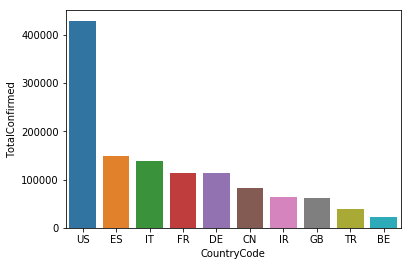

In [19]:
seaborn.barplot(x='CountryCode' , y='TotalConfirmed' , data=Data.head(10))

In [20]:
Cases = list(Data.iloc[1][[3,5,7]])

In [21]:
Cases_key = ['TotalConfirmed' , 'TotalDeaths' , 'TotalRecoved']

In [22]:
import subprocess , os,sys
countries = open("Countries.json",'w')

In [23]:
subprocess.call("curl --location --request GET 'https://api.covid19api.com/countries'" , shell=True , stdout = countries)

0

In [24]:
with open("Countries.json",'r') as file:
    output_countries = json.load(file)

In [25]:
output_countries[0].keys()
#list(output_countries[0].values())
#len(output_countries)

dict_keys(['Country', 'Slug', 'ISO2'])

In [132]:
Countries_DataFrame = pandas.DataFrame([list(output_countries[i].values()) for i in range(len(output_countries)) ] ,columns=list(output_countries[100].keys()))

In [102]:
for country in Countries_DataFrame['Slug']:
    pass
print(len(Countries_DataFrame['Slug']))
URL = 'https://api.covid19api.com/live/country/'+str('india')+'/status/confirmed'
print(URL)

248
https://api.covid19api.com/live/country/india/status/confirmed


In [124]:
def Country_Data_Load(value):
    countries_name = open("Country Live Data/"+str(value[0])+".json",'w')
    
    URL = 'https://api.covid19api.com/live/country/'+str(value[1])+'/status/confirmed/date/2020-01-01T00:00:00Z'
    subprocess.call("curl --location --request GET "+str(URL)+ "" , shell=True , stdout = countries_name)
    
    

In [96]:
#URL = 'https://api.covid19api.com/live/country/'+str('india')+'/status/confirmed'
#print(URL)
#countries_india = open("Countries.json",'w')
#subprocess.call("curl --location --request GET "+str(URL)+ "" , shell=True , stdout = countries_india)

https://api.covid19api.com/live/country/india/status/confirmed


0

In [27]:
import subprocess , os,sys
total= open("Total.json",'w')

In [29]:
subprocess.call("curl --location --request GET 'https://thevirustracker.com/free-api?global=stats'" , shell=True , stdout = countries)

0

In [30]:
with open("Total.json",'r') as file:
    output_Total = json.load(file)


In [31]:
output_Total

{'results': [{'total_cases': 1521253,
   'total_recovered': 331355,
   'total_unresolved': 1091267,
   'total_deaths': 88570,
   'total_new_cases_today': 3293,
   'total_new_deaths_today': 115,
   'total_active_cases': 1101328,
   'total_serious_cases': 48160,
   'total_affected_countries': 209,
   'source': {'url': 'https://thevirustracker.com/'}}],
 'stat': 'ok'}

In [54]:
V = list(output_Total['results'][0].values())
V=V[:-1]
K = list(output_Total['results'][0].keys())
K = K[:-1]
K

['total_cases',
 'total_recovered',
 'total_unresolved',
 'total_deaths',
 'total_new_cases_today',
 'total_new_deaths_today',
 'total_active_cases',
 'total_serious_cases',
 'total_affected_countries']

In [56]:
Total_Data = pandas.DataFrame([V] , columns=K)

In [58]:
Total_Data

,total_cases,total_recovered,total_unresolved,total_deaths,total_new_cases_today,total_new_deaths_today,total_active_cases,total_serious_cases,total_affected_countries
0,1521253,331355,1091267,88570,3293,115,1101328,48160,209


In [59]:
Full_Timeline= open("timeline.json",'w')

In [60]:
subprocess.call("curl --location --request GET 'https://thevirustracker.com/timeline/map-data.json'" , shell=True , stdout = Full_Timeline)

0

In [61]:
with open("timeline.json",'r') as file:
    output_Timeline = json.load(file)

In [94]:
countryCode = []

for data in output_Timeline['data']:
    countryCode.append(data['countrycode'])
output_Timeline['data']

{'countrycode': 'ST',
 'date': '4/06/20',
 'cases': '4',
 'deaths': '0',
 'recovered': '0'}

In [96]:
len(set(countryCode))
output_Timeline['data'][0].values()

dict_values(['CN', '1/22/20', '548', '17', '28'])

In [97]:
countryValues = []

for data in output_Timeline['data']:
    countryValues.append(list(data.values()))

In [101]:
Timeline_Dataframe = pandas.DataFrame(countryValues , columns=list(output_Timeline['data'][0].keys()))

In [104]:
Timeline_Dataframe.tail()

,countrycode,date,cases,deaths,recovered
6679,BI,4/06/20,3,0,0
6680,MW,4/06/20,5,0,0
6681,SS,4/06/20,1,0,0
6682,EH,4/06/20,4,0,0
6683,ST,4/06/20,4,0,0


In [110]:
A = Timeline_Dataframe.groupby(by='countrycode')

In [114]:
A.get_group('US')

,countrycode,date,cases,deaths,recovered
5,US,1/22/20,1,0,0
12,US,1/23/20,1,0,0
21,US,1/24/20,2,0,0
32,US,1/25/20,2,0,0
45,US,1/26/20,5,0,0
61,US,1/27/20,5,0,0
77,US,1/28/20,5,0,0
95,US,1/29/20,5,0,0
115,US,1/30/20,5,0,0
139,US,1/31/20,7,0,0
